# Chapter 4: Linear models

[Link to outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.9etj7aw4al9w)

Concept map:
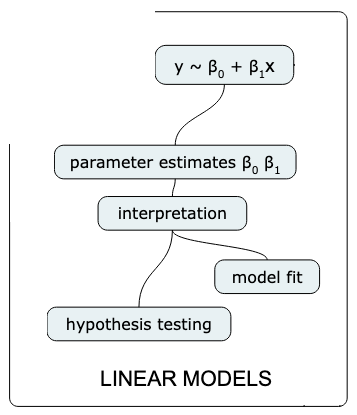

#### Notebook setup

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy.stats import uniform, norm


# notebooks figs setup
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,5)})
blue, orange  = sns.color_palette()[0], sns.color_palette()[1]

# silence annoying warnings
import warnings
warnings.filterwarnings('ignore')

## 4.1 Linear models for relationship between two numeric variables

- def'n linear model: **y ~ m*x + b**, a.k.a. linear regression
- Amy has collected a new dataset:
  - Instead of receiving a fixed amount of stats training (100 hours),
    **each employee now receives a variable amount of stats training (anywhere from 0 hours to 100 hours)**
  - Amy has collected ELV values after one year as previously
  - Goal find best fit line for relationship $\textrm{ELV} \sim \beta_0 + \beta_1\!*\!\textrm{hours}$
- Limitation: **we assume the change in ELV is proportional to number of hours** (i.e. linear relationship).
  Other types of hours-ELV relationship possible, but we will not be able to model them correctly (see figure below).

### New dataset

 - The `hours` column contains the `x` values (how many hours of statistics training did the employee receive),
 - The `ELV` column contains the `y` values (the employee ELV after one year)

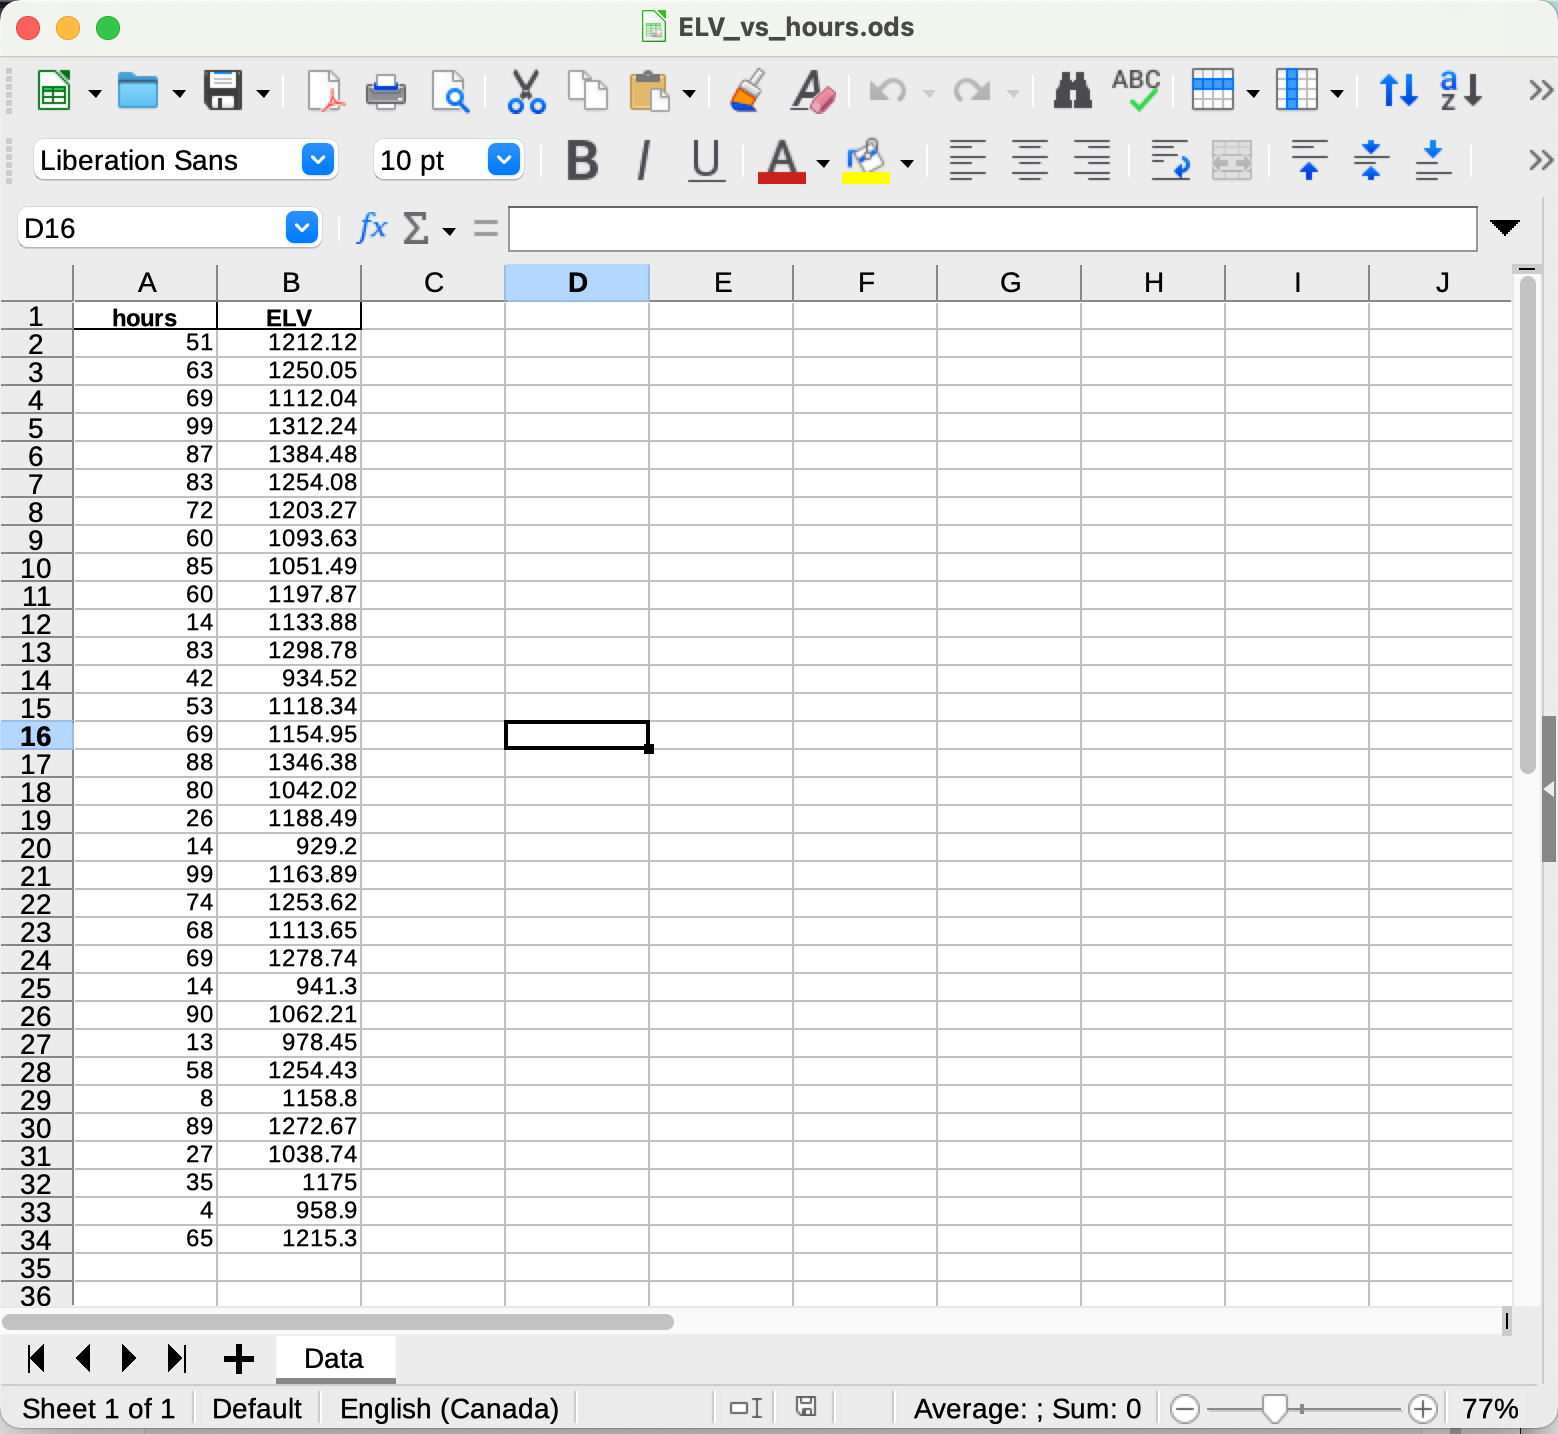




In [2]:
# Load data into a pandas dataframe
df2 = pd.read_excel("data/ELV_vs_hours.ods", sheet_name="Data")
# df2

In [3]:
df2.describe()

,hours,ELV
count,33.000000,33.000000
mean,57.909091,1154.046364
std,28.853470,123.055405
min,4.000000,929.200000
25%,35.000000,1062.210000
50%,65.000000,1163.890000
75%,83.000000,1253.620000
max,99.000000,1384.480000


<AxesSubplot:xlabel='hours', ylabel='ELV'>

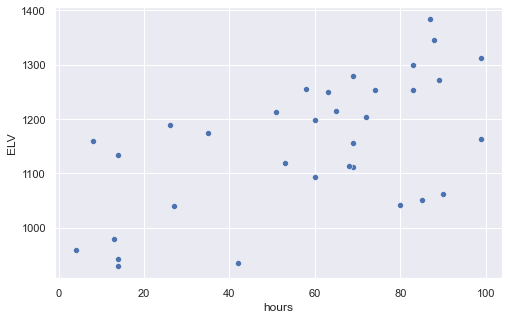

In [4]:
# plot ELV vs. hours data
sns.scatterplot(x='hours', y='ELV', data=df2)

In [5]:
# linear model plot (preview)
# sns.lmplot(x='hours', y='ELV', data=df2, ci=False)

#### Types of linear relationship between input and output

Different possible relationships between the number of hours of stats training and ELV gains:

![figures/ELV_as_function_of_stats_hours.png](figures/ELV_as_function_of_stats_hours.png)

## 4.2 Fitting linear models

- Main idea: use `fit` method from `statsmodels.ols` and a formula (approach 1)
- Visual inspection
- Results of linear model fit are:
  - `beta0` = $\beta_0$ = baseline ELV (y-intercept)
  - `beta1` = $\beta_1$ = increase in ELV for each additional hour of stats training (slope)
- Five more alternative fitting methods (bonus material):
  2. fit using statsmodels `OLS`
  3. solution using `linregress` from `scipy`
  4. solution using `optimize` from `scipy`
  5. linear algebra solution using `numpy`
  6. solution using `LinearRegression` model from scikit-learn

### Using statsmodels formula API

The `statsmodels` Python library offers a convenient way to specify statistics model as a "formula"  that describes the relationship we're looking for.

Mathematically, the linear model is written:

$\large \textrm{ELV} \ \ \sim \ \ \beta_0\cdot 1 \ + \ \beta_1\cdot\textrm{hours}$

and the formula is:

`ELV    ~        1  +       hours`

Note the variables $\beta_0$ and $\beta_1$ are omitted, since the whole point of fitting a linear model is to find these coefficients. The parameters of the model are:
- Instead of $\beta_0$, the constant parameter will be called `Intercept`
- Instead of a new name $\beta_1$, we'll call it `hours` coefficient (i.e. the coefficient associated with the `hours` variable in the model)


In [6]:
import statsmodels.formula.api as smf

model = smf.ols('ELV ~ 1 + hours', data=df2)
result = model.fit()

In [7]:
# extact the best-fit model parameters
beta0, beta1 = result.params
beta0, beta1

(1005.6736305656403, 2.562166505145919)

<AxesSubplot:xlabel='hours', ylabel='ELV'>

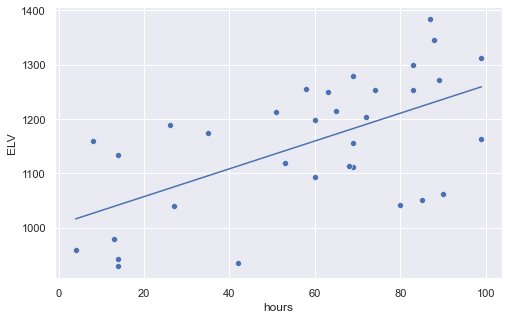

In [8]:
# data points
sns.scatterplot(x='hours', y='ELV', data=df2)

# linear model for data
x = df2['hours'].values   # input = hours
ymodel = beta0 + beta1*x  # output = ELV
sns.lineplot(x, ymodel)

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ELV   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     17.51
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           0.000218
Time:                        00:55:52   Log-Likelihood:                -197.75
No. Observations:                  33   AIC:                             399.5
Df Residuals:                      31   BIC:                             402.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1005.6736     39.499     25.461      0.000     925.115    1086.232
hours          2.5622      0.612      4.184      0.000       1.313       3.811
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.166
Skew:                          -0.368   Prob(JB):                        0.339
Kurtosis:                       1.983   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Alternative model fitting methods

2. fit using statsmodels [`OLS`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)
3. solution using [`linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) from `scipy`
4. solution using [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from `scipy`
5. [linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html) solution using `numpy`
6. solution using [`LinearRegression`](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) model from scikit-learn

#### Data pre-processing

The `statsmodels` formula `ols` approach we used above was able to get the data
directly from the dataframe `df2`, but some of the other model fitting methods
require data to be provided as regular arrays: the x-values and the y-values.

In [10]:
# extract hours and ELV data from df2
x = df2['hours'].values  # hours data as an array
y = df2['ELV'].values    # ELV data as an array

x.shape, y.shape
# x

((33,), (33,))

Two of the approaches required "packaging" the x-values along with a column of ones,
to form a matrix (called a design matrix). Luckily `statsmodels` provides a convenient function for this:

In [11]:
import statsmodels.api as sm

# add a column of ones to the x data
X = sm.add_constant(x)
X.shape
# X

(33, 2)

____

#### 2. fit using statsmodels OLS



In [12]:
model2 = sm.OLS(y, X)
result2 = model2.fit()
# result2.summary()
result2.params

array([1005.67363057,    2.56216651])

____

#### 3. solution using `linregress` from `scipy`

In [13]:
from scipy.stats import linregress

result3 = linregress(x, y)
result3.intercept, result3.slope

(1005.6736305656411, 2.562166505145915)

____

#### 4. Using an optimization approach


In [14]:
from scipy.optimize import minimize

def sse(beta, x=x, y=y):
    """Compute the sum-of-squared-errors objective function."""
    sumse = 0.0
    for xi, yi in zip(x, y):
        yi_pred = beta[0] + beta[1]*xi
        ei = (yi_pred-yi)**2
        sumse += ei
    return sumse

result4 = minimize(sse, x0=[0,0])
beta0, beta1 = result4.x
beta0, beta1

(1005.6734718528415, 2.5621687279414034)

____

#### 5. Linear algebra solution
We obtain the least squares solution using the Moore–Penrose inverse formula:
$$ \large
    \vec{\beta} = (X^{\sf T} X)^{-1}X^{\sf T}\; \vec{y}
$$

In [15]:
# 5. linear algebra solution using `numpy`
import numpy as np

result5 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
beta0, beta1 = result5
beta0, beta1

(1005.6736305656412, 2.562166505145917)

_____

#### Using scikit-learn


In [16]:
# 6. solution using `LinearRegression` from scikit-learn
from sklearn import linear_model
model6 = linear_model.LinearRegression()
model6.fit(x[:,np.newaxis], y)
model6.intercept_, model6.coef_

(1005.673630565641, array([2.56216651]))

## 4.3 Interpreting linear models

- model fit checks

  - $R^2$ [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
    = the proportion of the variation in the dependent variable that is predictable from the independent variable
  - plot of residuals
  - many other: see [scikit docs](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
- hypothesis tests
  - is slope zero or nonzero? (and CI interval)
  - caution: cannot make any cause-and-effect claims; only a correlation
- Predictions
  - given best-fir model obtained from data, we can make predictions (interpolations),  
    e.g., what is the expected ELV after 50 hours of stats training?

### Interpreting the results

Let's review some of the other data included in the `results.summary()` report for the linear model fit we did earlier.

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ELV   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     17.51
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           0.000218
Time:                        00:55:53   Log-Likelihood:                -197.75
No. Observations:                  33   AIC:                             399.5
Df Residuals:                      31   BIC:                             402.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1005.6736     39.499     25.461      0.000     925.115    1086.232
hours          2.5622      0.612      4.184      0.000       1.313       3.811
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.166
Skew:                          -0.368   Prob(JB):                        0.339
Kurtosis:                       1.983   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model parameters

In [18]:
beta0, beta1 = result.params
result.params

Intercept    1005.673631
hours           2.562167
dtype: float64

### The $R^2$ coefficient of determination

$R^2 = 1$ corresponds to perfect prediction


In [19]:
result.rsquared

0.36091871798872777

### Hypothesis testing for slope coefficient

Is there a non-zero slope coefficient?

- **null hypothesis $H_0$**: `hours` has no effect on `ELV`,
  which is equivalent to $\beta_1 = 0$:
  $$ \large
     H_0: \qquad \textrm{ELV} \sim \mathcal{N}(\color{red}{\beta_0}, \sigma^2) \qquad \qquad \qquad
  $$

- **alternative hypothesis $H_A$**: `hours` has an effect on `ELV`,
  and the slope is not zero, $\beta_1 \neq 0$:
  $$ \large
     H_A: \qquad \textrm{ELV} 
                 \sim
                 \mathcal{N}\left(
                     \color{blue}{\beta_0 + \beta_1\!\cdot\!\textrm{hours}},
                     \ \sigma^2
                 \right)
  $$

In [20]:
# p-value under the null hypotheis of zero slope or "no effect of `hours` on `ELV`"
result.pvalues.loc['hours']

0.00021840378059913016

In [21]:
# 95% confidence interval for the hours-slope parameter
# result.conf_int()
CI_hours = list(result.conf_int().loc['hours'])
CI_hours

[1.313270083442885, 3.811062926848953]

### Predictions using the model

We can use the model we obtained to predict (interpolate) the ELV for future employees.

<AxesSubplot:xlabel='hours', ylabel='ELV'>

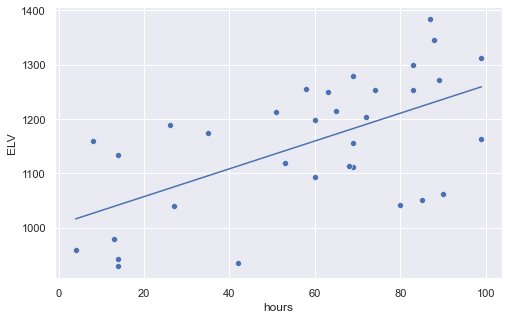

In [22]:
sns.scatterplot(x='hours', y='ELV', data=df2)
ymodel = beta0 + beta1*x
sns.lineplot(x, ymodel)

What ELV can we expect from a new employee that takes 50 hours of stats training?

In [23]:
result.predict({'hours':[50]})

0    1133.781956
dtype: float64

In [24]:
result.predict({'hours':[100]})

0    1261.890281
dtype: float64

**WARNING**: it's not OK to extrapolate the validity of the model outside of the range of values where we have observed data.

For example, there is no reason to believe in the model's predictions about ELV for 200 or 2000 hours of stats training:

In [25]:
result.predict({'hours':[200]})

0    1518.106932
dtype: float64

## Discussion

Further topics that will be covered in the book:
- Generalized linear models, e.g., [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
- [Everything is a linear model](https://www.eigenfoo.xyz/tests-as-linear/) article
- The verbs `fit` and `predict` will come up A LOT in machine learning,  
  so it's worth learning linear models in detail to be prepared for further studies.


____


Congratulations on completing this overview of statistics! We covered a lot of topics and core ideas from the book. I know some parts seemed kind of complicated at first, but if you think about them a little you'll see there is nothing too difficult to learn. The good news is that the examples in these notebooks contain all the core ideas, and you won't be exposed to anything more complicated that what you saw here!

If you were able to handle these notebooks, you'll be able to handle the **No Bullshit Guide to Statistics** too! In fact the book will cover the topics in a much smoother way, and with better explanations. You'll have a lot of exercises and problems to help you practice statistical analysis.


### Next steps

- I encourage you to check out the [book outline shared gdoc](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit) if you haven't seen it already. Please leave me a comment in the google document if you see something you don't like in the outline, or if you think some important statistics topics are missing. You can also read the [book proposal blog post](https://minireference.com/blog/no-bullshit-guide-to-statistics-progress-update/) for more info about the book.
- Check out also the [concept map](https://minireference.com/static/excerpts/noBSstats/conceptmaps/BookSubjectsOverview.pdf). You can print it out and annotate with the concepts you heard about in these notebooks.
- If you want to be involved in the stats book in the coming months, sign up to the [stats reviewers mailing list](https://confirmsubscription.com/h/t/A17516BF2FCB41B2) to receive chapter drafts as they are being prepared (Nov+Dec 2021). I'll appreciate your feedback on the text. The goal is to have the book finished in the Spring 2022, and feedback and "user testing" will be very helpful.



